8a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor.  Use the summary() function to print the results.  Comment on the output.

In [4]:
import statsmodels.api as sm
import pandas as pd
import os
direct = os.getcwd()

In [32]:
auto = pd.read_csv(os.path.join(direct, 'Auto.csv'))

auto['remove'] = auto['horsepower'].apply(lambda x: 1 if x=='?' else 0)
auto2 = auto.loc[auto['remove']==0]

response = auto2['mpg']
var = auto2['horsepower'].astype('int')
model = sm.OLS(response, sm.add_constant(var)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           7.03e-81
Time:                        13:06:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

****Answer:**** There is a negative relationship between horsepower and mpg.  As horsepower increases, mpg decreases.  The resulting p-value is very low, and suggests with high confidence that horsepower can be used to predict mpg.  We'd predict an mpg of 39.9359 - (0.1578 * 98) or 24.47 for a car with horsepower of 98.  With 95% confidence we expect the true coefficient value for horsepower to be between -0.171 and -0.145

8b) Plot the response and predictor with the linear regression line

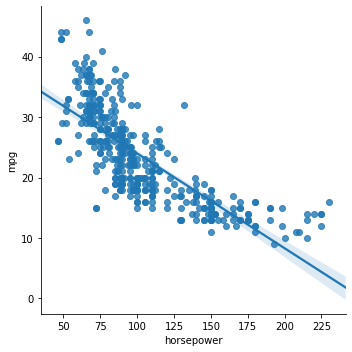

In [70]:
import seaborn as sns
toPlot = auto2[['horsepower', 'mpg']]
new = toPlot.astype('int')
sns.lmplot(x='horsepower', y='mpg', data=new, fit_reg=True);

8c) Check diagnostic plots and describe findings

In [75]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import numpy as np

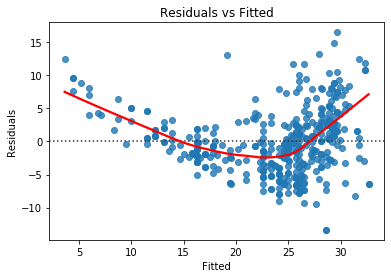

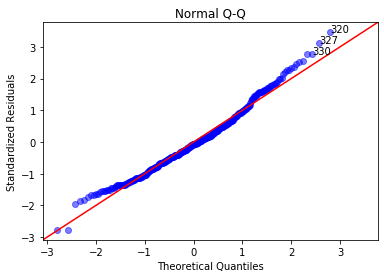

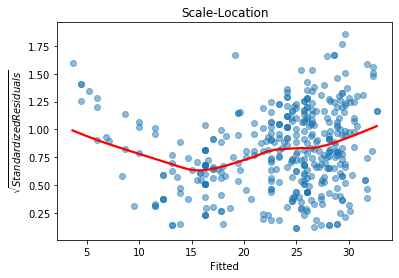

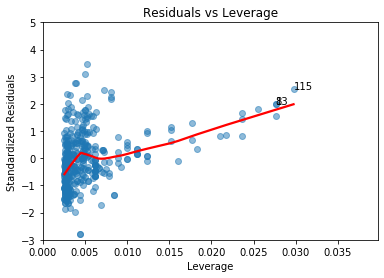

In [116]:
model_fitted = model.fittedvalues
residuals = model.resid
norm_residuals = model.get_influence().resid_studentized_internal
norm_abs_sqrt = np.sqrt(np.abs(norm_residuals))
abs_resid = np.abs(residuals)
leverage = model.get_influence().hat_matrix_diag
cooks = model.get_influence().cooks_distance[0]

plot = plt.figure()
plot.axes[0] = sns.residplot(model_fitted, 'mpg', data=new, lowess=True, line_kws={'color':'red'});
plot.axes[0].set_title('Residuals vs Fitted');
plot.axes[0].set_xlabel('Fitted');
plot.axes[0].set_ylabel('Residuals');


qq = ProbPlot(norm_residuals)
plot = qq.qqplot(line='45', alpha=0.5);
plot.axes[0].set_title('Normal Q-Q');
plot.axes[0].set_xlabel('Theoretical Quantiles');
plot.axes[0].set_ylabel('Standardized Residuals');
abs_norm_resid = np.flip(np.argsort(np.abs(norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot.axes[0].annotate(i, xy=(np.flip(qq.theoretical_quantiles, 0)[r], norm_residuals[i]))
    

plot = plt.figure()
plt.scatter(model_fitted, norm_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted, norm_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color':'red'});
plot.axes[0].set_title('Scale-Location');
plot.axes[0].set_xlabel('Fitted');
plot.axes[0].set_ylabel('$\sqrt{Standardized Residuals}$');


plot = plt.figure()
plt.scatter(leverage, norm_residuals, alpha=0.5);
sns.regplot(leverage, norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color':'red'});
plot.axes[0].set_xlim(0, max(leverage)+0.01);
plot.axes[0].set_ylim(-3,5);
plot.axes[0].set_title('Residuals vs Leverage');
plot.axes[0].set_xlabel('Leverage');
plot.axes[0].set_ylabel('Standardized Residuals');
leverage_3 = np.flip(np.argsort(cooks), 0)[:3]
for i in leverage_3:
    plot.axes[0].annotate(i, xy=(leverage[i], norm_residuals[i]))

****Answer:**** The residuals as well as the scatter plot suggest a non-linear relationship.  The residuals vs. leverage plot indicates a good amount of outliers as well as high leverage points.

***
9a) Produce a scatter plot of all the variables in the auto dataset

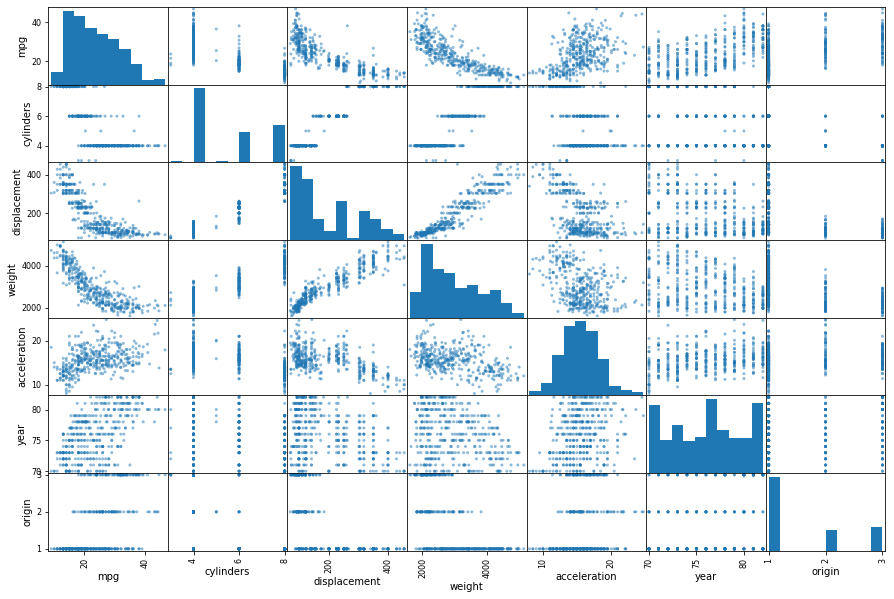

In [123]:
auto = pd.read_csv(os.path.join(direct, 'Auto.csv'))
pd.plotting.scatter_matrix(auto, figsize=(15,10));

9b) Calcuate the correlation matrix (exclude name from data)

In [124]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


9c) Use the lm() funciton to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.  Use the summary() funciton to print the results.  Comment on the output.

In [139]:
auto2=auto.iloc[:,:-1]
auto2['remove'] = auto2['horsepower'].apply(lambda x: 1 if x=='?' else 0)
auto3 = auto2.loc[auto2['remove']==0]
auto4 = auto3.iloc[:,:-1]
auto5 = auto4.astype('float64')

y = auto5['mpg']
x = auto5.iloc[:,1:]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          2.04e-139
Time:                        14:11:20   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

****Answer:**** There is a relationship between some predictors and the response. displacement, weight, year, and origin seem to be the most useful for prediction.  A cars mpg improves by 0.75 each year. 

9e)  Fit the linear regression with interaction effects.  Do any seem to be statistically significant?

In [160]:
interactionAuto = auto5[['mpg', 'weight', 'cylinders', 'displacement']]
interactionAuto['cylinder_displacement'] = interactionAuto['cylinders'] * interactionAuto['displacement']

y = interactionAuto['mpg']
x = interactionAuto.iloc[:, 1:]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     242.1
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          6.65e-104
Time:                        14:23:51   Log-Likelihood:                -1115.5
No. Observations:                 392   AIC:                             2241.
Df Residuals:                     387   BIC:                             2261.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    52.39

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


****Answer:**** The interaction term of cylinder * displacement appears to be statistically significant

9f)  Try some transformations on variables, such as log, square root, and squared and comment on findings.

In [164]:
transformAuto = auto5[['mpg', 'origin', 'year', 'weight']]
transformAuto['weight_log'] = np.log(transformAuto['weight'])
transformAuto['weight_squared'] = transformAuto['weight'] * transformAuto['weight']
transformAuto['weight_sqrt'] = np.sqrt(transformAuto['weight'])

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

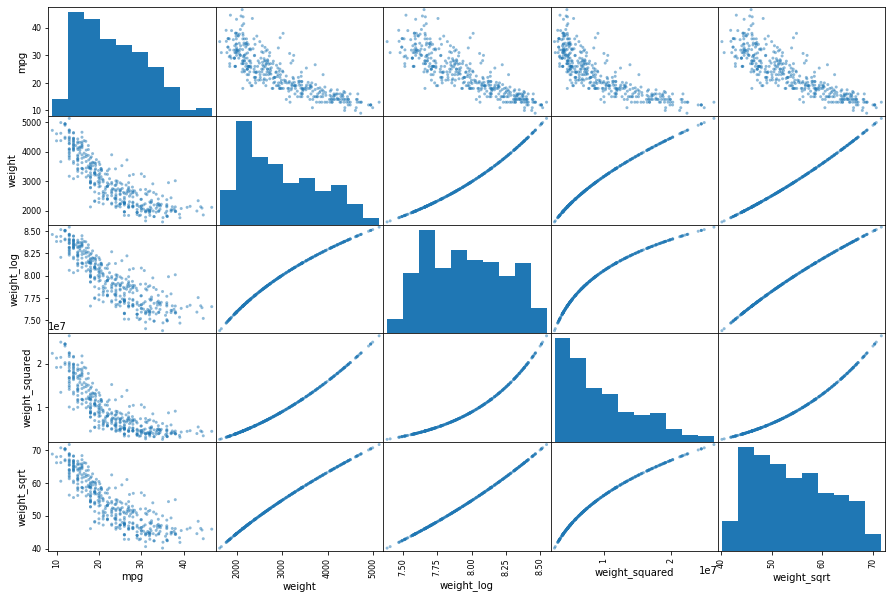

In [166]:
pd.plotting.scatter_matrix(transformAuto[['mpg', 'weight', 'weight_log', 'weight_squared', 'weight_sqrt']], figsize=(15,10));

Logged looks like it transformed to most linear, followed closely by sqrt.  Squaring makes it look even worse.  Based on R-squared and F-stat, lets see what the models say.

In [167]:
y = transformAuto['mpg']
x = transformAuto[['origin', 'year', 'weight_log']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     684.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.55e-154
Time:                        14:31:31   Log-Likelihood:                -1000.7
No. Observations:                 392   AIC:                             2009.
Df Residuals:                     388   BIC:                             2025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.7655      7.535     15.363      0.0

In [171]:
y = transformAuto['mpg']
x = transformAuto[['origin', 'year', 'weight_sqrt']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     635.6
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          2.58e-149
Time:                        14:33:31   Log-Likelihood:                -1012.8
No. Observations:                 392   AIC:                             2034.
Df Residuals:                     388   BIC:                             2050.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9009      4.237      0.213      

In [172]:
y = transformAuto['mpg']
x = transformAuto[['origin', 'year', 'weight']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          7.26e-143
Time:                        14:33:42   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0459      4.001     -4.510      0.0

In [168]:
y = transformAuto['mpg']
x = transformAuto[['origin', 'year', 'weight_squared']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     470.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          7.51e-129
Time:                        14:31:45   Log-Likelihood:                -1060.5
No. Observations:                 392   AIC:                             2129.
Df Residuals:                     388   BIC:                             2145.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -28.2434      4.189     -6.

Confirmed based on the stats, that my assumption was correct.  Each model gets progressively worse based on the non linear form of weight (or its transformation)

***
10a) Fit a multiple regression model to predict Sales, using Price, Urban, and US in the Carseats dataset.

10b) Interpret the coefficient values.

10c) Write out the model in equation form.

In [177]:
carseats = pd.read_csv(os.path.join(direct, 'Carseats.csv'))
toFit = carseats[['Sales', 'Price', 'Urban', 'US']]
toFit['Urban_IO'] = toFit['Urban'].apply(lambda x: 1 if x=='Yes' else 0)
toFit['US_IO'] = toFit['US'].apply(lambda x: 1 if x=='Yes' else 0)

y = toFit['Sales']
x = toFit[['Price', 'Urban_IO', 'US_IO']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           2.39e-23
Time:                        14:56:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


****Answer:****
* Sales drop by 0.0545 for every unit increase in price.
* Sales drop by 0.0219 for if urban
* Sales increase by 1.2 if in the US

Models:
* Urban and US:  
Y = 14.2222 - 0.0545 * Price

* Urban only:  
Y = 13.0216 - 0.0545 * Price

* US only:  
Y = 14.2441 - 0.0545 * Price

10d, e, & f) remove variables that should be rejected and build model.  Compare original model with new model

In [178]:
y = toFit['Sales']
x = toFit[['Price', 'US_IO']]

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           2.66e-24
Time:                        15:02:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

****Answer:**** Both models have the same R-squared of 0.239.  This model does not fit the data very well.

10g) What are the 95% CI for the coefficients?

****Answer:****
* constant:  (11.79, 14.271)
* Price:  (-0.065, -0.044)
* US:  (0.692, 1.708)

10h) Are there outliers or high leverage observations?

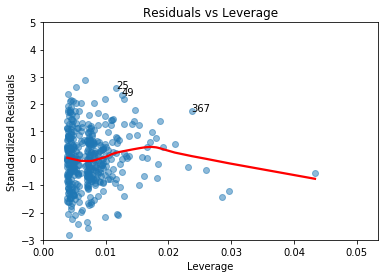

In [179]:
model_fitted = model.fittedvalues
residuals = model.resid
norm_residuals = model.get_influence().resid_studentized_internal
norm_abs_sqrt = np.sqrt(np.abs(norm_residuals))
abs_resid = np.abs(residuals)
leverage = model.get_influence().hat_matrix_diag
cooks = model.get_influence().cooks_distance[0]

plot = plt.figure()
plt.scatter(leverage, norm_residuals, alpha=0.5);
sns.regplot(leverage, norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color':'red'});
plot.axes[0].set_xlim(0, max(leverage)+0.01);
plot.axes[0].set_ylim(-3,5);
plot.axes[0].set_title('Residuals vs Leverage');
plot.axes[0].set_xlabel('Leverage');
plot.axes[0].set_ylabel('Standardized Residuals');
leverage_3 = np.flip(np.argsort(cooks), 0)[:3]
for i in leverage_3:
    plot.axes[0].annotate(i, xy=(leverage[i], norm_residuals[i]))

****Answer:****  There seem to be a decent amount of outliers, and a few high leverage points.

***
11

In [188]:
error = pd.DataFrame(np.random.normal(size=100), columns=['e'])
data = pd.DataFrame(np.random.normal(size=100), columns=['X'])
data['Y'] = data['X'] * 2 + error['e']

11a) Perform a regression of y onto x

In [189]:
model = sm.OLS(data['Y'], data['X']).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              515.6
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.89e-41
Time:                        15:13:25   Log-Likelihood:                         -145.86
No. Observations:                 100   AIC:                                      293.7
Df Residuals:                      99   BIC:                                      296.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

****Answer:**** See above for standard error, t-stat, etc.  There is a clear relationship between X and Y, and we reject the null hypothesis.

11b) Perform a regression of X onto Y

In [190]:
model = sm.OLS(data['X'], data['Y']).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              515.6
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.89e-41
Time:                        15:15:39   Log-Likelihood:                         -63.459
No. Observations:                 100   AIC:                                      128.9
Df Residuals:                      99   BIC:                                      131.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

11c) What is the relationship between a and b?

****Answer:**** the t stat is the exact same

***
15a) Fit a simple linear regression model to predict per capita crime rate of the Boston dataset.  Which models have statistically significant association.  Create plots to prove the association.

In [216]:
boston = pd.read_csv(os.path.join(direct, 'Boston.csv'), delimiter=r"\s+")
y = boston['crim']

In [206]:
for c in boston.columns[1:]:
    x = boston[c]
    print(c)
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print(model.summary())
    print('\n------------------------------------------\n')

zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           5.51e-06
Time:                        15:49:54   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

------------------------------------------

tax
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           2.36e-47
Time:                        15:49:54   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

****Answer:**** zn, indus, nox, rm, age, dis, rad, tax, ptratio, b, lstat, and medv are all statistically significant.

15b) Fit a mutliple linear regression with the variables deemed important above.  Which predictors can we remove from the model?

In [217]:
x = boston.drop(columns=['crim', 'chas'])

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     34.10
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           3.19e-57
Time:                        15:59:38   Log-Likelihood:                -1653.5
No. Observations:                 506   AIC:                             3333.
Df Residuals:                     493   BIC:                             3388.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1260      7.229      2.369      0.0

****Answer:**** Can remove indus, rm, age, tax, ptratio, and lstat from the model

11c) Create a scatter plot of the coefficients from the simple regression (x) and the multiple regression (y)

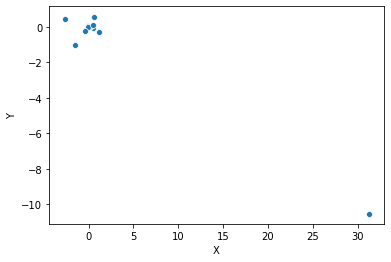

In [223]:
data = {'zn':[-0.0739, 0.0450], 'indus':[0.5098, -0.0692], 'nox':[31.2485, -10.5274], 'rm':[-2.6841, 0.44]
       ,'age':[0.1078, 0.0009], 'dis':[-1.5509, -0.9933], 'rad':[0.6179, 0.5843], 'tax':[0.0297, -0.0035]
       ,'ptratio':[1.1520, -0.2660], 'b':[-0.0363, -0.0076], 'lstat':[0.5488, 0.1260], 'medv':[-0.3632, -0.2045]}
df = pd.DataFrame.from_dict(data, orient='index', columns=['X', 'Y'])
sns.scatterplot(x='X', y='Y', data=df)